In [1]:
# Load libraries
import os 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency 
import seaborn as sns 
from random import randrange, uniform 

In [5]:
import fancyimpute
from fancyimpute import KNN

ModuleNotFoundError: No module named 'fancyimpute'

In [2]:
# Set working directory
os.chdir("F:/Analytics")

In [3]:
os.getcwd()

'F:\\Analytics'

In [4]:
# Load data 
marketing_train = pd.read_csv("marketing_tr.csv")

In [5]:
marketing_train.shape

(7414, 22)

In [6]:
marketing_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [7]:
#Exploratory Data Analysis
marketing_train['schooling'] = marketing_train['schooling'].replace("illiterate", "unknown")
marketing_train['schooling'] = marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"], "high.school")
marketing_train['default'] = marketing_train['default'].replace("yes", "unknown")
marketing_train['marital'] = marketing_train['marital'].replace("unknown", "married")
marketing_train['month'] = marketing_train['month'].replace(["sep","oct","mar","dec"], "dec")
marketing_train['month'] = marketing_train['month'].replace(["aug","jul","jun","may","nov"], "jun")
marketing_train['loan'] = marketing_train['loan'].replace("unknown", "no")
marketing_train['profession'] = marketing_train['profession'].replace(["management","unknown","unemployed","admin."], "admin.")
marketing_train['profession'] = marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"], "blue-collar")

In [8]:
#Create dataframe with missing percentage 
missing_val = pd.DataFrame(marketing_train.isnull().sum())

In [9]:
missing_val


,0
custAge,1804
profession,0
marital,0
schooling,2155
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,711


In [10]:
#Reset index
missing_val = missing_val.reset_index()

In [11]:
missing_val 

,index,0
0,custAge,1804
1,profession,0
2,marital,0
3,schooling,2155
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,711


In [12]:
#Rename Variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [13]:
missing_val

,Variables,Missing_percentage
0,custAge,1804
1,profession,0
2,marital,0
3,schooling,2155
4,default,0
5,housing,0
6,loan,0
7,contact,0
8,month,0
9,day_of_week,711


In [14]:
#Calculate Percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(marketing_train))*100

In [15]:
missing_val


,Variables,Missing_percentage
0,custAge,24.332344
1,profession,0.000000
2,marital,0.000000
3,schooling,29.066631
4,default,0.000000
5,housing,0.000000
6,loan,0.000000
7,contact,0.000000
8,month,0.000000
9,day_of_week,9.589965


In [16]:
#descending order 
missing_val = missing_val.sort_values('Missing_percentage',ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Missing_perc.csv",index = False)

In [17]:
missing_val

,Variables,Missing_percentage
0,schooling,29.066631
1,custAge,24.332344
2,day_of_week,9.589965
3,previous,0.000000
4,pastEmail,0.000000
5,pmonths,0.000000
6,nr.employed,0.000000
7,euribor3m,0.000000
8,cons.conf.idx,0.000000
9,cons.price.idx,0.000000


In [18]:
# create missing value
marketing_train['custAge'].loc[70] 

29.0

In [19]:
marketing_train['custAge'].loc[70] = np.nan

F:\Python\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
#imputation method
#Actual Value = 29
#Mean = 40.011766803351755
#Median = 38
#KNN = 31.33331383566591

In [22]:
marketing_train['custAge'].loc[70] 

38.0

In [77]:
#Impute with mean
marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].mean())

In [21]:
#Impute with median
marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].median())

In [23]:
#KNN imputation
#Assigning levels to the categories 
lis = []
for i in range(0, marketing_train.shape[1]):
    #print(i)
    if(marketing_train.iloc[:,i].dtypes == 'object'):
        marketing_train.iloc[:,i] = pd.Categorical(marketing_train.iloc[:,i])
        #print(marketing_train[[i]])
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].cat.codes 
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].astype('object')
        
        lis.append(marketing_train.columns[i])

In [24]:
marketing_train

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,0,2,1,1,0,0,0,2,1,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,38.0,1,1,-1,0,0,0,0,2,1,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.0,1,1,0,0,0,0,1,2,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.0,0,0,-1,1,2,1,0,2,4,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,38.0,0,0,1,0,2,0,0,2,3,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.0,1,2,0,0,0,0,1,2,4,...,0,1,1.1,93.994,-36.4,4.859,5191.0,999.0,0,0
7410,45.0,1,1,0,1,0,0,1,2,3,...,0,1,1.4,93.918,-42.7,4.961,5228.1,999.0,0,0
7411,27.0,1,2,-1,0,0,0,0,2,0,...,1,0,-1.8,92.893,-46.2,1.250,5099.1,999.0,3,0
7412,51.0,0,0,0,1,2,0,0,2,2,...,0,1,-0.1,93.200,-42.0,4.076,5195.8,999.0,0,0


In [76]:
#Apply KNN imputation algorithm
#marketing_train = pd.DataFrame(KNN(k = 3).fit_transform(marketing_train), columns = marketing_train.columns)

NameError: name 'KNN' is not defined

In [43]:
#marketing_train.loc[:,i] = marketing_train.loc[:,i].float()
#marketing_train.loc[:,i] = np.exp(marketing_train.loc[:,i])

KeyError: 21

In [42]:

#Convert into proper datatypes
#for i in lis: 
   
#    marketing_train.loc[:,i] = marketing_train.loc[:,i].round()
#    marketing_train.loc[:,i] = marketing_train.loc[:,i].astype('object')

TypeError: loop of ufunc does not support argument 0 of type int which has no callable rint method

In [25]:
marketing_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,0,2,1,1,0,0,0,2,1,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,38.0,1,1,-1,0,0,0,0,2,1,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.0,1,1,0,0,0,0,1,2,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.0,0,0,-1,1,2,1,0,2,4,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,38.0,0,0,1,0,2,0,0,2,3,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


# Outlier Analysis

In [26]:
marketing_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,0,2,1,1,0,0,0,2,1,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,38.0,1,1,-1,0,0,0,0,2,1,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.0,1,1,0,0,0,0,1,2,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.0,0,0,-1,1,2,1,0,2,4,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,38.0,0,0,1,0,2,0,0,2,3,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


In [27]:
df = marketing_train.copy()


In [44]:
#marketing_train = df.copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x21a9eb843d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21a9eb84a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a9eb84070>],
 'medians': [<matplotlib.lines.Line2D at 0x21a9eb91190>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a9eb914f0>],
 'means': []}

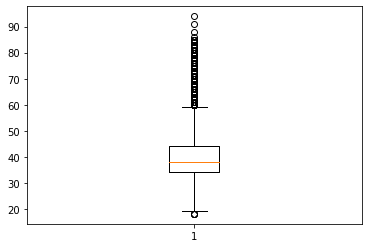

In [28]:
#Plot boxplot to Visualize Outliers
%matplotlib inline

plt.boxplot(marketing_train['custAge'])

In [29]:
#save numerical names
cnames = ["custAge", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "pmonths", "pastEmail"]

In [30]:
#Detect and delete the outliers from data
for i in cnames:
    print(i)
    q75, q25 = np.percentile(marketing_train.loc[:,i],[75, 25])
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] < min].index)
    marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] > max].index)

custAge
19.0
59.0
campaign
-2.0
6.0
pdays
999.0
999.0
previous
0.0
0.0
emp.var.rate
-4.85
5.15
cons.price.idx
92.00900000000001
95.185
cons.conf.idx
-52.150000000000006
-26.949999999999992
euribor3m
2.6095
6.3735
nr.employed
5135.349999999999
5283.750000000001
pmonths
999.0
999.0
pastEmail
0.0
0.0


In [31]:
##Load the data again
#Detect and replace with NA
#Extract quartiles
q75, q25 = np.percentile(marketing_train['custAge'],[75,25])

In [32]:
q25

34.0

In [33]:
q75

44.0

In [34]:
#Calculate IQR
iqr = q75 - q25

In [53]:
iqr

10.0

In [35]:
#Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

In [36]:
minimum

19.0

In [37]:
maximum

59.0

In [38]:
#Replace with NA
marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan

In [39]:
#Calculate missing value
missing_val = pd.DataFrame(marketing_train.isnull().sum())

In [40]:
missing_val

,0
custAge,0
profession,0
marital,0
schooling,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [60]:
#Impute with KNN
marketing_train = pd.DataFrame(KNN(k = 3).fit_transform(marketing_train), columns = marketing_train.columns)

NameError: name 'KNN' is not defined

In [52]:
#marketing_train.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

# Feature Selection

In [41]:
cnames

['custAge',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail']

In [46]:
##Correlation Analysis
#Correlation Plot
df_corr = marketing_train.loc[:,cnames]

In [47]:
df_corr.shape

(7414, 11)

<AxesSubplot:>

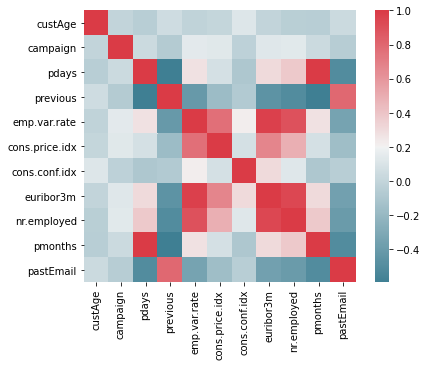

In [48]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7,5))

#Generate correlation matrix
corr=df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True),square=True, ax=ax)

In [49]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["profession","marital", "schooling", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "responded"]

In [50]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(marketing_train['responded'], marketing_train[i]))
    print(p)

profession
1.6242589537712605e-34
marital
4.693435664866768e-05
schooling
8.197123528632523e-05
default
1.626010224096433e-15
housing
0.5469213692385477
loan
0.09547438986454948
contact
4.416434113838791e-36
month
3.3492292613263237e-139
day_of_week
0.13826234929472533
poutcome
3.898575747043989e-181
responded
0.0


In [51]:
marketing_train = marketing_train.drop(['pdays', 'emp.var.rate', 'day_of_week', 'loan', 'housing'], axis=1)

In [52]:
marketing_train.shape

(7414, 17)

# Feature Scaling

In [76]:
marketing_train.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,0,2,1,1,0,2,1,0,1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,38.0,1,1,-1,0,0,2,1,0,1,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.0,1,1,0,0,1,2,1,0,1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.0,0,0,-1,1,0,2,2,0,1,93.918,-42.7,4.962,5228.1,999.0,0,0
4,38.0,0,0,1,0,0,2,5,1,0,92.893,-46.2,1.291,5099.1,999.0,1,0


In [64]:
df = marketing_train.copy()


In [74]:
#marketing_train = df.copy()

(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

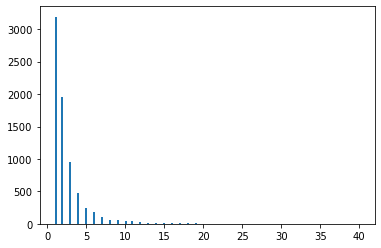

In [75]:
#Normality Check
%matplotlib inline
plt.hist(marketing_train['campaign'], bins='auto')

In [56]:
cnames = ["custAge", "campaign", "previous", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "pmonths", "pastEmail"]

In [57]:
cnames


['custAge',
 'campaign',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail']

In [77]:
#Normalisation
for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - marketing_train[i].min())/(marketing_train[i].max() - marketing_train[i].min())

custAge
campaign
previous
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

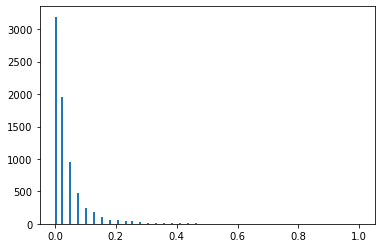

In [67]:
#Normality Check
%matplotlib inline
plt.hist(marketing_train['campaign'], bins='auto')

In [78]:
marketing_train.head(10)

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,1,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0
1,0.263158,1,1,-1,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,0
2,0.315789,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
3,0.486842,0,0,-1,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,0
4,0.263158,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0
5,0.381579,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
6,0.223684,1,2,-1,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,1
7,0.263158,1,1,0,0,1,2,0.025641,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,0
8,0.131579,0,1,0,0,0,2,0.000000,0.000000,1,0.269680,0.192469,0.153933,0.512287,1.0,0.000000,0
9,0.368421,1,1,0,0,0,2,0.025641,0.166667,0,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0


In [71]:
#Standardisation
#for i in cnames:
#    print(i)
#    marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()

custAge
campaign
previous
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [73]:
marketing_train.head(10)

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,1.675489,0,2,1,1,0,2,-0.563381,-0.356270,1,-0.640982,-0.309408,0.348370,0.418223,0.202109,-0.286829,0
1,-0.164754,1,1,-1,0,0,2,-0.563381,-0.356270,1,0.600493,-0.459952,0.789092,0.860031,0.202109,-0.286829,0
2,0.268244,1,1,0,0,1,2,-0.563381,-0.356270,1,0.731902,0.894945,0.730062,0.352568,0.202109,-0.286829,0
3,1.675489,0,0,-1,1,0,2,-0.192331,-0.356270,1,0.600493,-0.459952,0.790239,0.860031,0.202109,-0.286829,0
4,-0.164754,0,0,1,0,0,2,0.920818,1.578809,0,-1.171807,-1.212672,-1.313650,-0.904465,0.202109,0.505772,0
5,0.809492,1,1,0,0,1,2,-0.563381,-0.356270,1,0.731902,0.894945,0.730062,0.352568,0.202109,-0.286829,0
6,-0.489503,1,2,-1,0,1,2,-0.563381,-0.356270,1,0.731902,0.894945,0.729489,0.352568,0.202109,-0.286829,1
7,-0.164754,1,1,0,0,1,2,-0.192331,-0.356270,1,0.731902,0.894945,0.729489,0.352568,0.202109,-0.286829,0
8,-1.247250,0,1,0,0,0,2,-0.563381,-0.356270,1,-1.171807,-1.212672,-1.301041,-0.904465,0.202109,-0.286829,0
9,0.701242,1,1,0,0,0,2,-0.192331,1.578809,0,-0.640982,-0.309408,0.348370,0.418223,0.202109,-0.286829,0


(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

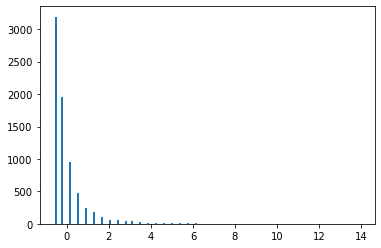

In [72]:
#Normality Check
%matplotlib inline
plt.hist(marketing_train['campaign'], bins='auto')

# Sampling Techniques

In [80]:
#marketing_train.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,1,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0
1,0.263158,1,1,-1,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,0
2,0.315789,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
3,0.486842,0,0,-1,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,0
4,0.263158,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0


In [82]:
#marketing_train.shape

(7414, 17)

In [83]:
##Simple Random Sampling
#Sim_sampling = marketing_train.sample(5000)

In [87]:
#Sim_sampling.head(10)

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
3626,0.105263,1,1,0,0,0,0,0.025641,0.000000,1,0.340608,0.154812,0.175924,0.512287,1.0,0.000000,1
2057,0.223684,1,2,0,0,1,2,0.128205,0.000000,1,0.269680,0.192469,0.148946,0.512287,1.0,0.000000,0
1716,0.723684,2,1,-1,1,0,2,0.000000,0.000000,1,0.000000,0.811715,0.049875,0.425709,1.0,0.000000,0
6078,0.394737,1,1,0,1,0,2,0.000000,0.000000,1,0.484412,0.615063,0.981637,1.000000,1.0,0.000000,0
7120,0.236842,0,1,1,0,0,2,0.000000,0.333333,0,0.000000,0.811715,0.055543,0.425709,1.0,0.333333,0
2795,0.131579,1,1,0,1,0,2,0.051282,0.166667,0,0.269680,0.192469,0.157107,0.512287,1.0,0.111111,0
850,0.315789,1,1,0,0,0,0,0.000000,0.000000,1,0.340608,0.154812,0.174790,0.512287,1.0,0.000000,0
6837,0.328947,1,1,-1,1,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957606,0.859735,1.0,0.000000,0
7314,0.144737,0,2,0,1,1,2,0.051282,0.000000,1,0.698753,0.602510,0.956926,0.859735,1.0,0.000000,0
5063,0.486842,1,1,0,1,0,2,0.025641,0.000000,1,0.484412,0.615063,0.981410,1.000000,1.0,0.000000,0


In [92]:
##Systematic Sampling
#Calculate the K value
#k = int(len(marketing_train)/3500)

In [93]:
#k

2

In [94]:
# Generate a random number using simple random sampling
#RandNum = randrange(0, 5)

In [95]:
#RandNum 

4

In [96]:
#Select Kth observation starting from RandNum
#Sys_Sampling = marketing_train.iloc[RandNum::k, :]

In [97]:
#Sys_Sampling.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
4,0.263158,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0
6,0.223684,1,2,-1,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,1
8,0.131579,0,1,0,0,0,2,0.000000,0.000000,1,0.269680,0.192469,0.153933,0.512287,1.0,0.000000,0
10,0.263158,0,1,-1,0,0,2,0.051282,0.000000,1,0.484412,0.615063,0.981864,1.000000,1.0,0.000000,0
12,0.223684,0,2,1,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980050,1.000000,1.0,0.000000,0


In [99]:
#Sys_Sampling.shape

(3705, 17)

In [100]:
#Stratified Sampling
#from sklearn.model_selection import train_test_split

#Select Categorical Variable
#y = marketing_train['profession']

In [101]:
#Select subset using stratified sampling
#Rest, Sample = train_test_split(marketing_train, test_size = 0.6, stratify = y)

In [102]:
#Sample.shape

(4449, 17)

In [103]:
#Sample.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
1120,0.302632,1,1,-1,1,1,2,0.051282,0.000000,1,0.882307,0.376569,0.980957,1.000000,1.0,0.000000,0
3795,0.210526,1,1,0,0,0,2,0.000000,0.000000,1,0.269680,0.192469,0.150759,0.512287,1.0,0.000000,0
1975,0.105263,0,2,0,0,0,0,0.000000,0.000000,1,0.340608,0.154812,0.174790,0.512287,1.0,0.000000,1
2711,0.381579,0,1,1,1,0,2,0.000000,0.000000,1,0.269680,0.192469,0.157107,0.512287,1.0,0.000000,0
411,0.434211,1,1,-1,0,0,2,0.025641,0.166667,0,0.389322,0.368201,0.806393,0.877883,1.0,0.055556,0


In [43]:
#Import libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [42]:
marketing_train.head(20)

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,1,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0
1,0.263158,1,1,-1,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,0
2,0.315789,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
3,0.486842,0,0,-1,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,0
4,0.263158,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0
5,0.381579,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0
6,0.223684,1,2,-1,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,1
7,0.263158,1,1,0,0,1,2,0.025641,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,0
8,0.131579,0,1,0,0,0,2,0.000000,0.000000,1,0.269680,0.192469,0.153933,0.512287,1.0,0.000000,0
9,0.368421,1,1,0,0,0,2,0.025641,0.166667,0,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0


In [44]:
#Replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace(0, 'No')
marketing_train['responded'] = marketing_train['responded'].replace(1, 'Yes')

In [45]:
marketing_train.head(20)

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.486842,0,2,1,1,0,2,0.000000,0.000000,1,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,No
1,0.263158,1,1,-1,0,0,2,0.000000,0.000000,1,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,No
2,0.315789,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,No
3,0.486842,0,0,-1,1,0,2,0.025641,0.000000,1,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,No
4,0.263158,0,0,1,0,0,2,0.102564,0.166667,0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,No
5,0.381579,1,1,0,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,No
6,0.223684,1,2,-1,0,1,2,0.000000,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,Yes
7,0.263158,1,1,0,0,1,2,0.025641,0.000000,1,0.698753,0.602510,0.957153,0.859735,1.0,0.000000,No
8,0.131579,0,1,0,0,0,2,0.000000,0.000000,1,0.269680,0.192469,0.153933,0.512287,1.0,0.000000,No
9,0.368421,1,1,0,0,0,2,0.025641,0.166667,0,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,No


In [46]:
#Divide data into train and test
X = marketing_train.values[:, 0:16]
Y = marketing_train.values[:,16]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [47]:

X_train

array([[0.2631578947368421, 0, 1, ..., 0.5122873345935728, 1.0, 0.0],
       [0.2631578947368421, 0, 2, ..., 0.22646502835538615, 1.0,
        0.16666666666666666],
       [0.32894736842105265, 1, 2, ..., 1.0, 1.0, 0.0],
       ...,
       [0.13157894736842105, 1, 2, ..., 0.5122873345935728, 1.0,
        0.1111111111111111],
       [0.2631578947368421, 1, 1, ..., 0.8597353497164447, 1.0, 0.0],
       [0.881578947368421, 1, 0, ..., 0.20378071833648256, 1.0, 0.0]],
      dtype=object)

In [48]:

#Decision Tree
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [49]:
y_predict = clf.predict(X_test)

In [50]:
y_predict


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [51]:
X = pd.DataFrame(X_train)

In [52]:
import numpy as np

X.to_csv("X_train.csv",index = False)

In [53]:
#Create dot file to visualise tree  #http://webgraphviz.com/
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(clf, out_file=dotfile, feature_names =  X.columns)

In [54]:
marketing_train.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'contact',
       'month', 'campaign', 'previous', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [55]:
#build confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_predict)


In [56]:
CM

array([[1208,  103],
       [ 119,   53]], dtype=int64)

In [57]:
CM = pd.crosstab(y_test, y_predict)

In [58]:
CM

col_0,No,Yes
row_0,,
No,1208,103
Yes,119,53


In [59]:
#Let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [60]:
#check accuracy of model
accuracy_score(y_test, y_predict)*100

85.03034389750506

In [61]:
#Accuracy
((TP + TN)*100)/(TP + TN + FP + FN)

85.03034389750506

In [62]:
#False Negative Rate
(FN*100)/(FN + TP)

69.18604651162791

In [63]:
#Recall
(TP*100)/(TP + FN)

30.813953488372093

In [64]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
    

In [65]:
RF_Predictions = RF_model.predict(X_test)

In [66]:
RF_Predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [67]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 89
#FNR: 71

88.13216453135536

In [68]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace('No', 0)
marketing_train['responded'] = marketing_train['responded'].replace('Yes', 1)

In [69]:
marketing_train['responded']

0       0
1       0
2       0
3       0
4       0
       ..
7409    0
7410    0
7411    0
7412    0
7413    0
Name: responded, Length: 7414, dtype: int64

In [70]:
#Create logistic data. Save target variable first
marketing_train_logit = pd.DataFrame(marketing_train['responded'])

In [71]:
marketing_train_logit

,responded
0,0
1,0
2,0
3,0
4,0
...,...
7409,0
7410,0
7411,0
7412,0


In [72]:
cnames

['custAge',
 'campaign',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail']

In [73]:
#Add continous variables
marketing_train_logit = marketing_train_logit.join(marketing_train[cnames])

In [74]:
marketing_train_logit.head()      

,responded,custAge,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,0.486842,0.000000,0.000000,0.389322,0.368201,0.806393,0.877883,1.0,0.000000
1,0,0.263158,0.000000,0.000000,0.669135,0.338912,0.980730,1.000000,1.0,0.000000
2,0,0.315789,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0,0.000000
3,0,0.486842,0.025641,0.000000,0.669135,0.338912,0.981183,1.000000,1.0,0.000000
4,0,0.263158,0.102564,0.166667,0.269680,0.192469,0.148946,0.512287,1.0,0.055556


In [75]:
##Create dummies for categorical variables
cat_names = ["profession", "marital", "schooling", "default", "contact", "month", "poutcome"]

for i in cat_names:
    temp = pd.get_dummies(marketing_train[i], prefix = i)
    marketing_train_logit = marketing_train_logit.join(temp)

In [76]:
marketing_train_logit.head()      

,responded,custAge,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,...,default_0,default_1,contact_0,contact_1,month_0,month_1,month_2,poutcome_0,poutcome_1,poutcome_2
0,0,0.486842,0.000000,0.000000,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,...,0,1,1,0,0,0,1,0,1,0
1,0,0.263158,0.000000,0.000000,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,...,1,0,1,0,0,0,1,0,1,0
2,0,0.315789,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,...,1,0,0,1,0,0,1,0,1,0
3,0,0.486842,0.025641,0.000000,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,...,0,1,1,0,0,0,1,0,1,0
4,0,0.263158,0.102564,0.166667,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,...,1,0,1,0,0,0,1,1,0,0


In [77]:
Sample_Index = np.random.rand(len(marketing_train_logit)) < 0.8

train = marketing_train_logit[Sample_Index]
test = marketing_train_logit[~Sample_Index]

In [78]:
#Select column indexes for independent variables
train_cols = train.columns[1:30]

In [79]:
#Build Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['responded'], train[train_cols]).fit()

logit.summary()

         Current function value: 0.273766
         Iterations: 35


F:\Python\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
F:\Python\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
F:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              responded   No. Observations:                 5948
Model:                          Logit   Df Residuals:                     5924
Method:                           MLE   Df Model:                           23
Date:                Tue, 13 Oct 2020   Pseudo R-squ.:                  0.2223
Time:                        13:41:45   Log-Likelihood:                -1628.4
converged:                      False   LL-Null:                       -2093.7
Covariance Type:            nonrobust   LLR p-value:                6.911e-182
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
custAge            0.0562      0.421      0.133      0.894      -0.769       0.881
campaign          -1.7022      0.991     -1.718      0.086      -3.644       0.239
previous          -0.7518      0.991     -0.759      0.448      -2.693       1.190
cons.price.idx     2.1879      0.579      3.779      0.000       1.053       3.323
cons.conf.idx      1.4555      0.352      4.138      0.000       0.766       2.145
euribor3m         -3.6293      0.951     -3.818      0.000      -5.492      -1.766
nr.employed        1.5958      1.108      1.441      0.150      -0.575       3.767
pmonths           -1.5514      0.548     -2.831      0.005      -2.626      -0.477
pastEmail         -0.2569      0.778     -0.330      0.741      -1.782       1.268
profession_0       0.2158   3.97e+06   5.44e-08      1.000   -7.78e+06    7.78e+06
profession_1       0.1273   3.97e+06   3.21e-08      1.000   -7.77e+06    7.77e+06
profession_2       0.4896   3.98e+06   1.23e-07      1.000   -7.81e+06    7.81e+06
profession_3       0.8899      4e+06   2.22e-07      1.000   -7.85e+06    7.85e+06
marital_0         -0.1984        nan        nan        nan         nan         nan
marital_1         -0.1759        nan        nan        nan         nan         nan
marital_2         -0.1410        nan        nan        nan         nan         nan
schooling_-1      -0.1021        nan        nan        nan         nan         nan
schooling_0       -0.2013        nan        nan        nan         nan         nan
schooling_1        0.0565        nan        nan        nan         nan         nan
schooling_2        0.4404        nan        nan        nan         nan         nan
default_0         -0.6458    2.6e+06  -2.48e-07      1.000    -5.1e+06     5.1e+06
default_1         -0.9716    2.6e+06  -3.74e-07      1.000   -5.09e+06    5.09e+06
contact_0          0.1369        nan        nan        nan         nan         nan
contact_1         -0.5130        nan        nan        nan         nan         nan
month_0           -0.0801   3.96e+06  -2.02e-08      1.000   -7.77e+06    7.77e+06
month_1            0.2955   3.96e+06   7.45e-08      1.000   -7.77e+06    7.77e+06
month_2           -0.5915   3.96e+06  -1.49e-07      1.000   -7.77e+06    7.77e+06
poutcome_0        -0.6188      0.531     -1.166      0.244      -1.659       0.422
poutcome_1        -0.0915      0.525     -0.174      0.862      -1.121       0.938
==================================================================================
"""

In [80]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

<ipython-input-80-187e25a2caf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Actual_prob'] = logit.predict(test[train_cols])


In [81]:
test.head()

,responded,custAge,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,...,default_1,contact_0,contact_1,month_0,month_1,month_2,poutcome_0,poutcome_1,poutcome_2,Actual_prob
14,0,0.263158,0.000000,0.000000,0.389322,0.368201,0.797778,0.877883,1.0000,0.000000,...,1,1,0,0,0,1,0,1,0,0.040961
16,1,0.184211,0.000000,0.000000,0.669135,0.338912,0.981410,1.000000,1.0000,0.000000,...,0,1,0,0,0,1,0,1,0,0.053742
21,1,0.184211,0.000000,0.166667,0.269680,0.192469,0.157107,0.512287,0.0002,0.055556,...,0,1,0,0,0,1,0,0,1,0.456428
22,0,0.171053,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0000,0.000000,...,0,0,1,0,0,1,0,1,0,0.048146
25,0,0.157895,0.128205,0.000000,0.669135,0.338912,0.981410,1.000000,1.0000,0.000000,...,0,1,0,0,0,1,0,1,0,0.042604


In [82]:
test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

<ipython-input-82-56a7217dd28e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ActualVal'] = 1
F:\Python\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [83]:
test.head()

,responded,custAge,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,...,contact_0,contact_1,month_0,month_1,month_2,poutcome_0,poutcome_1,poutcome_2,Actual_prob,ActualVal
14,0,0.263158,0.000000,0.000000,0.389322,0.368201,0.797778,0.877883,1.0000,0.000000,...,1,0,0,0,1,0,1,0,0.040961,0
16,1,0.184211,0.000000,0.000000,0.669135,0.338912,0.981410,1.000000,1.0000,0.000000,...,1,0,0,0,1,0,1,0,0.053742,0
21,1,0.184211,0.000000,0.166667,0.269680,0.192469,0.157107,0.512287,0.0002,0.055556,...,1,0,0,0,1,0,0,1,0.456428,0
22,0,0.171053,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0000,0.000000,...,0,1,0,0,1,0,1,0,0.048146,0
25,0,0.157895,0.128205,0.000000,0.669135,0.338912,0.981410,1.000000,1.0000,0.000000,...,1,0,0,0,1,0,1,0,0.042604,0


In [84]:
#Build confusion matrix
CM = pd.crosstab(test['responded'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

(FN*100)/(FN+TP)

74.70588235294117

In [ ]:
#Accuracy: 90
#FNR: 74

In [85]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)

In [86]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [87]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 89
#FNR: 74.86

81.3953488372093

In [88]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [89]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [91]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 81
#FNR: 49

49.41860465116279

# Cluster Analysis

In [93]:
#Load Data
df = pd.read_csv("iris.csv")

In [94]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [95]:
#Load required libraries
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(df.iloc[:,0:4])
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [96]:
clusters_df.head()

,num_clusters,cluster_errors
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182


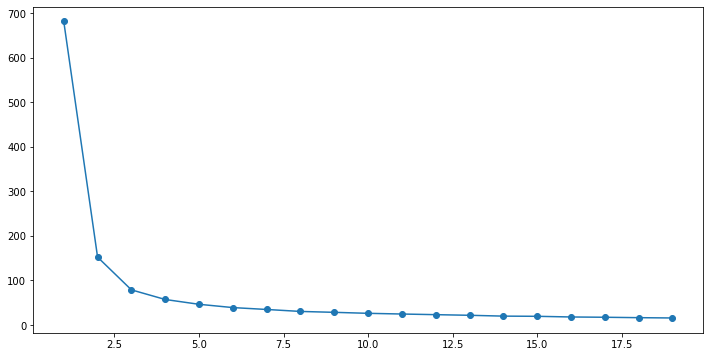

In [97]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [98]:
#Implement kmeans
kmeans_model = KMeans(n_clusters = 3).fit(df.iloc[:,0:4])

In [99]:
#Summarize output
pd.crosstab(df['Species'], kmeans_model.labels_)

col_0,0,1,2
Species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36
